In [2]:
%load_ext autoreload
%autoreload 2

In [255]:
import sys
sys.path.append('../src/')
import stochastic_benchmark

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import seaborn.objects as so

import bootstrap
import df_utils
import interpolate
import random_exploration
import sequential_exploration
import names
import stats
import success_metrics
import training

from setups import *

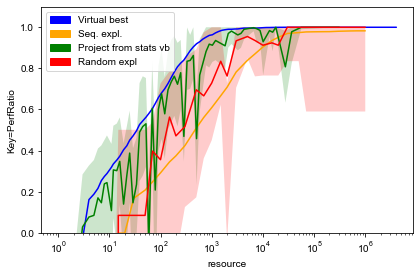

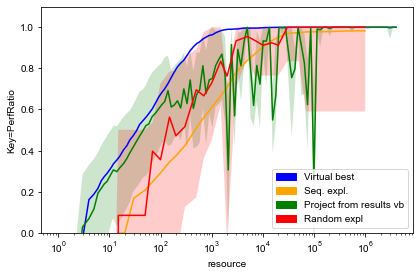

Best recommended parameters generated from stats


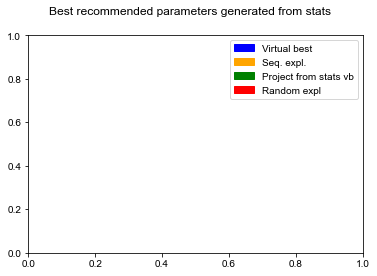

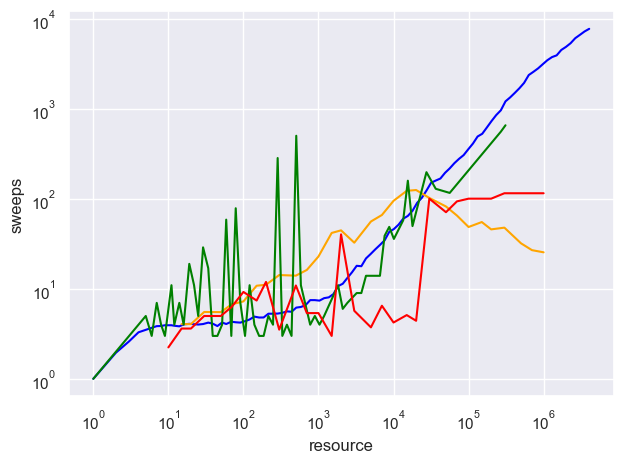

Best recommended parameters generated from results


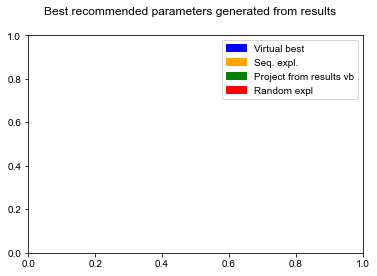

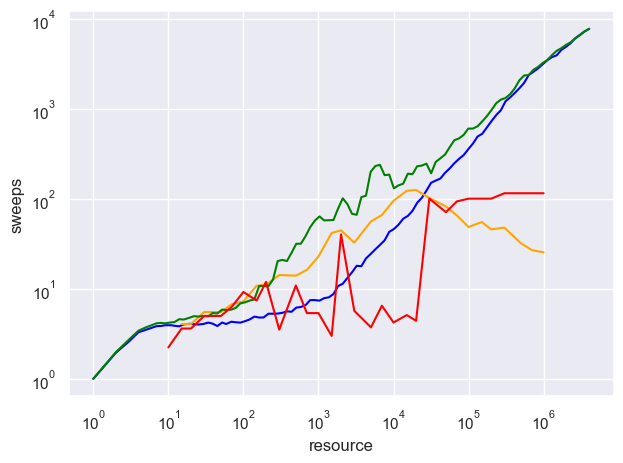

<Figure size 432x288 with 0 Axes>

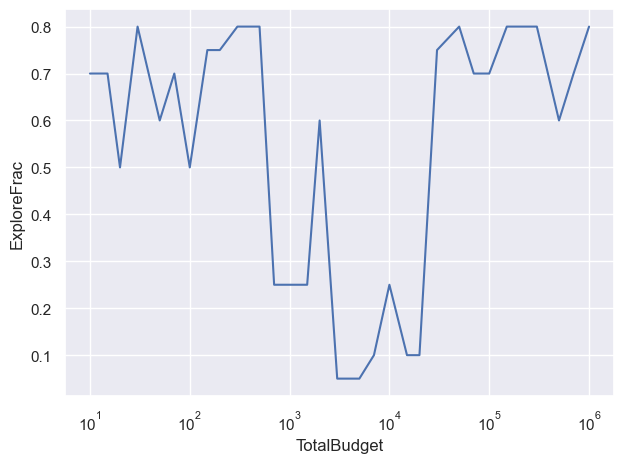

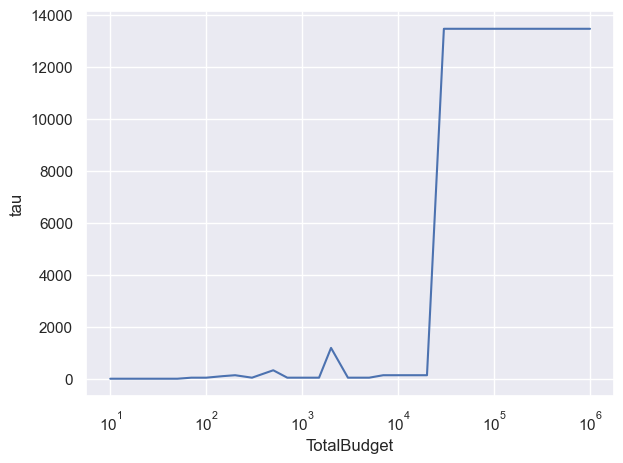

In [265]:
sb = max_clique_setup(0.5)

sb.plot_performance('PerfRatio', 'median')
sb.plot_parameters('PerfRatio')
fig= sb.plot_random_metaparams()

100%|█| 22320/22320 [01:55<00:00, 192.


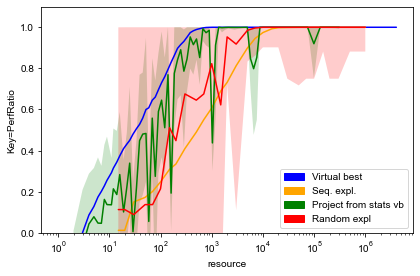

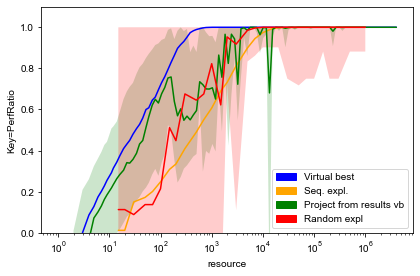

Best recommended parameters generated from stats


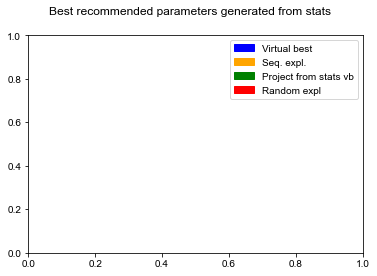

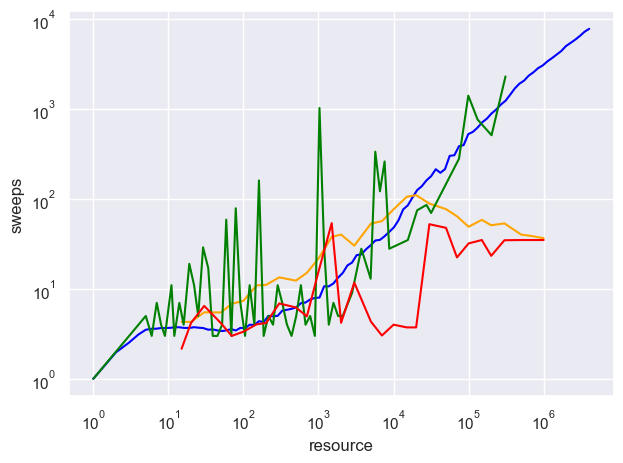

Best recommended parameters generated from results


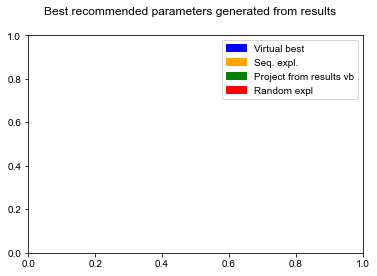

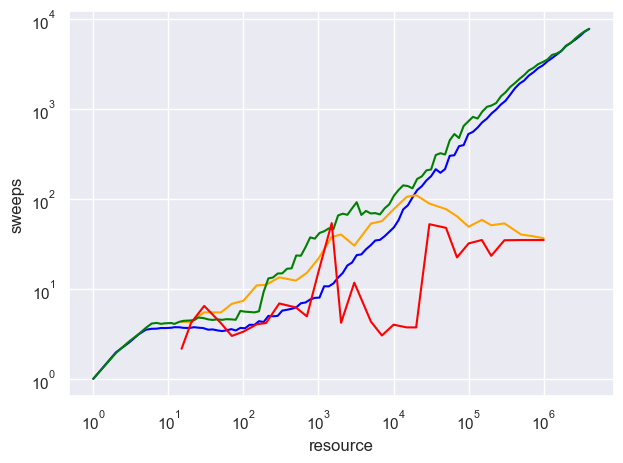

<Figure size 432x288 with 0 Axes>

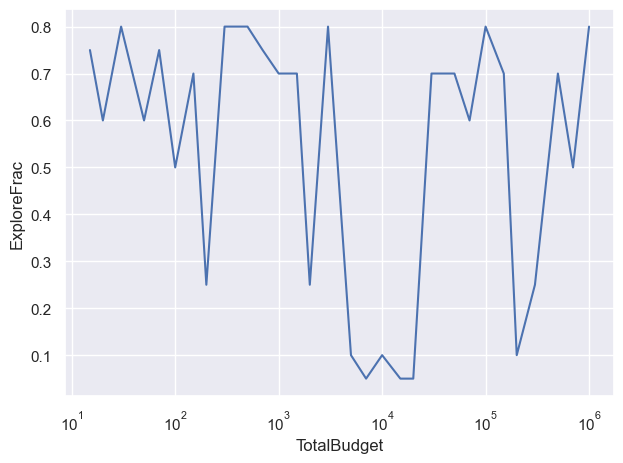

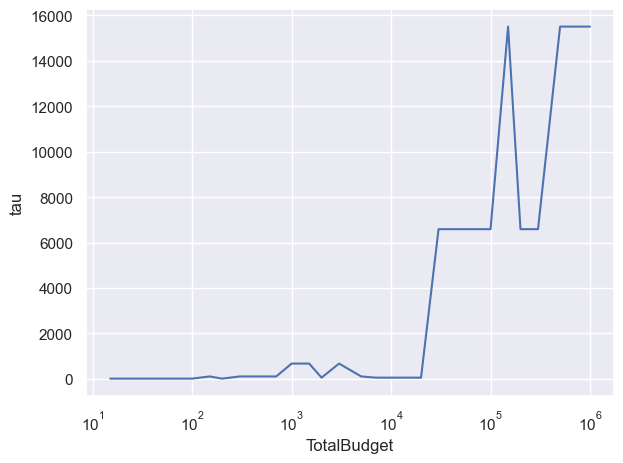

In [267]:
sb = max_clique_setup(0.25)

sb.plot_performance('PerfRatio', 'median')
sb.plot_parameters('PerfRatio')
fig= sb.plot_random_metaparams()


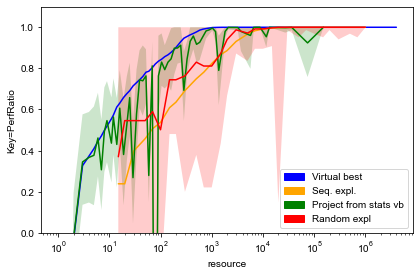

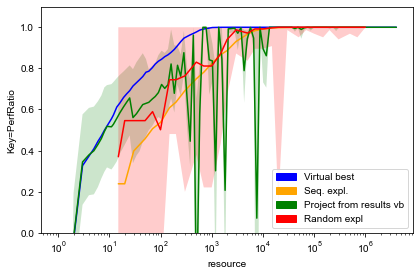

Best recommended parameters generated from stats


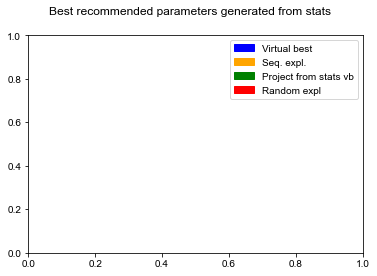

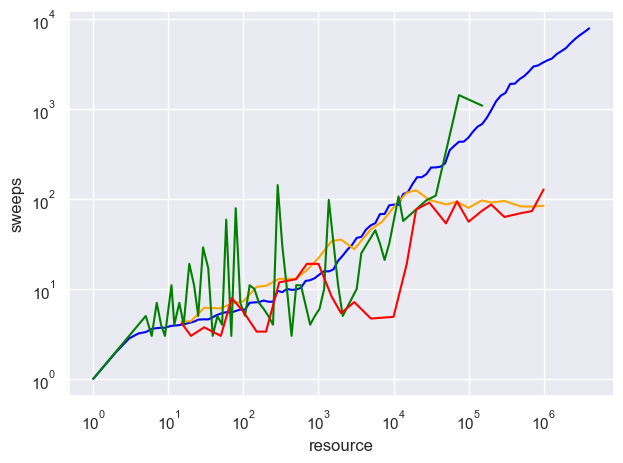

Best recommended parameters generated from results


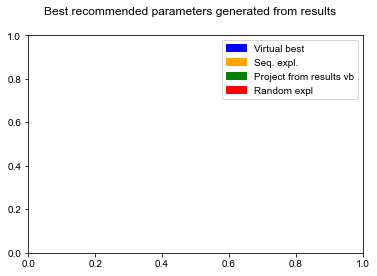

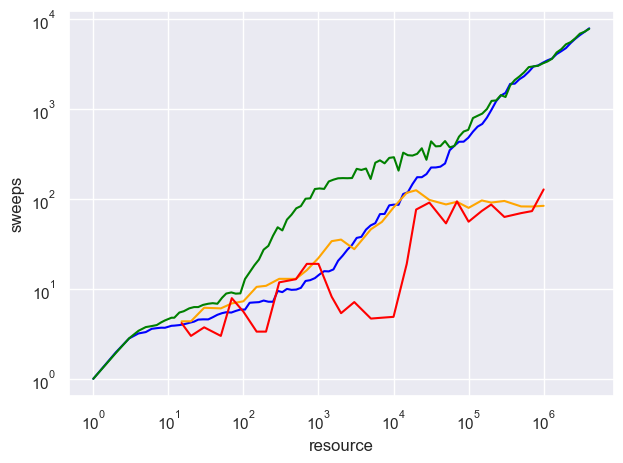

<Figure size 432x288 with 0 Axes>

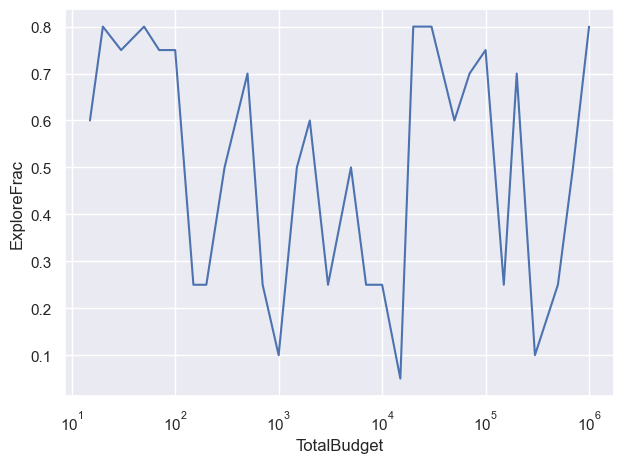

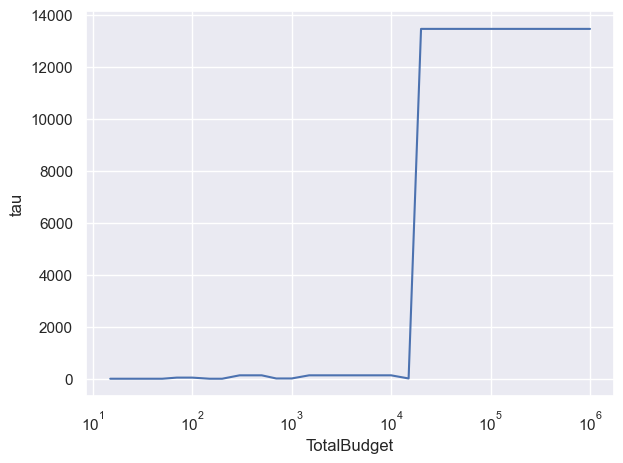

In [268]:
sb = max_clique_setup(0.75)

sb.plot_performance('PerfRatio', 'median')
sb.plot_parameters('PerfRatio')
fig= sb.plot_random_metaparams()

../notebooks/example_data/wishart_N=50_alpha=0.80


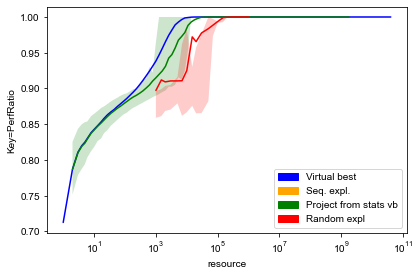

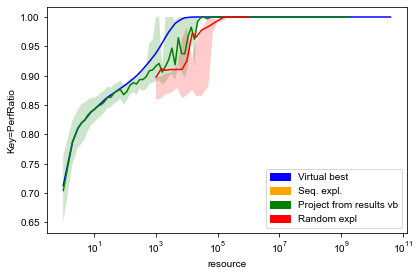

Best recommended parameters generated from stats


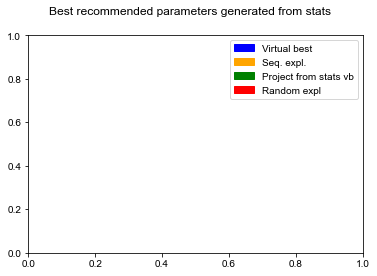

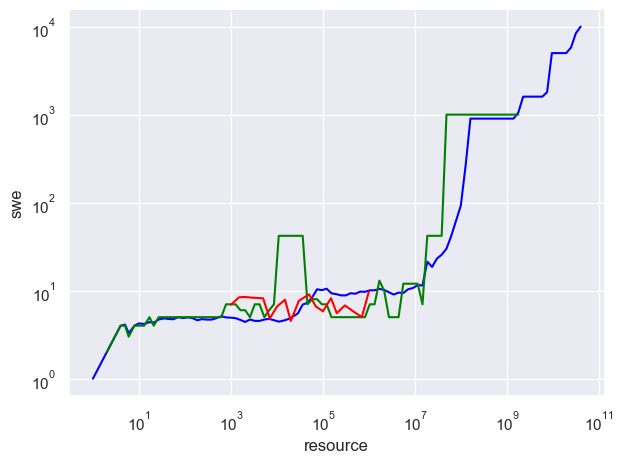

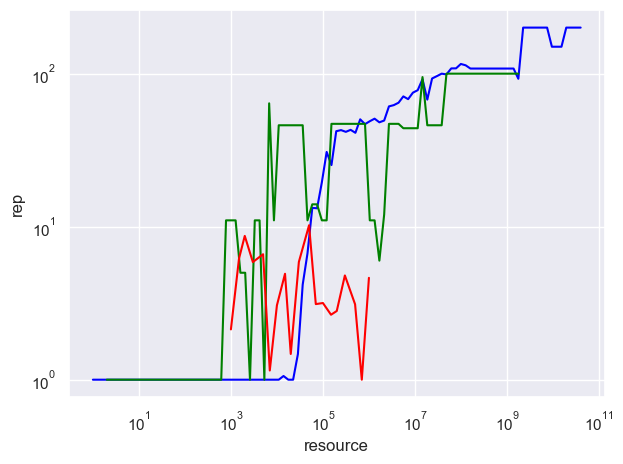

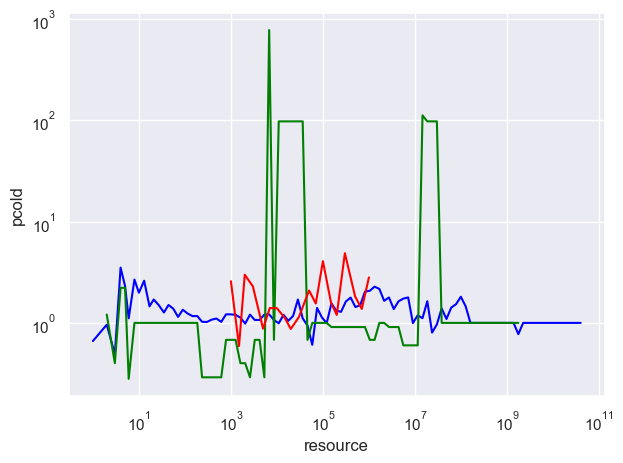

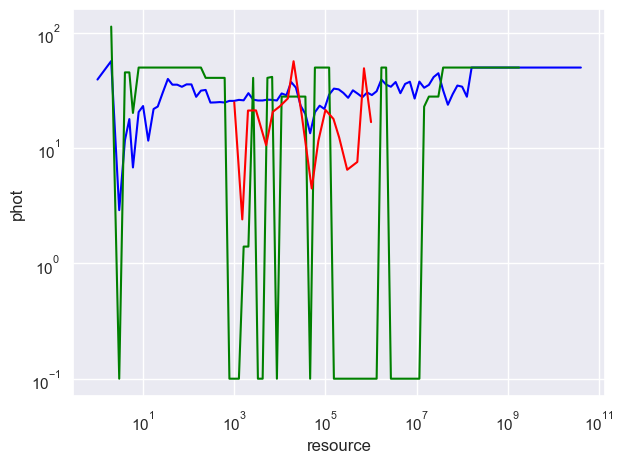

Best recommended parameters generated from results


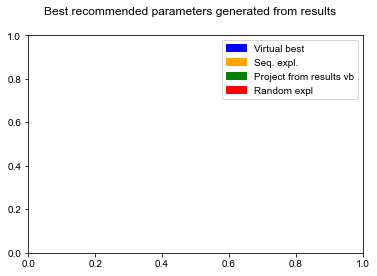

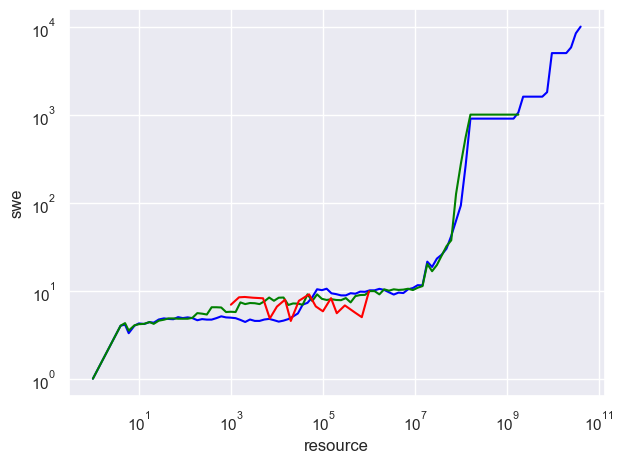

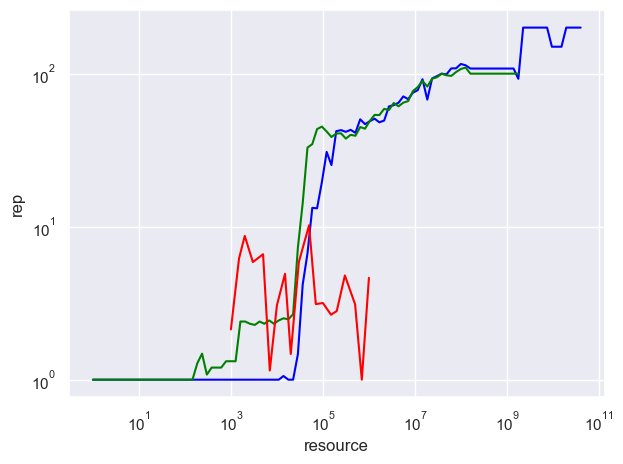

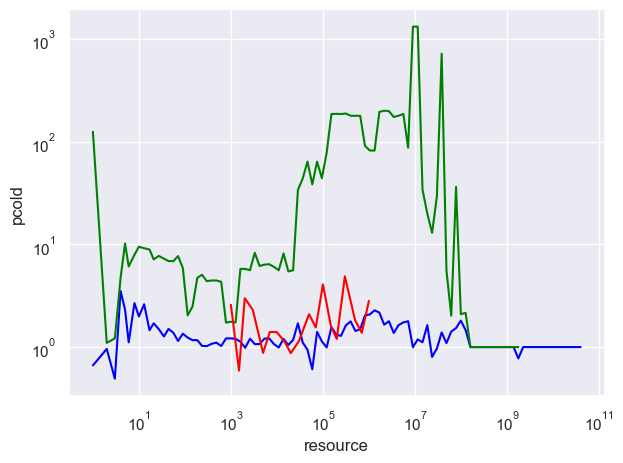

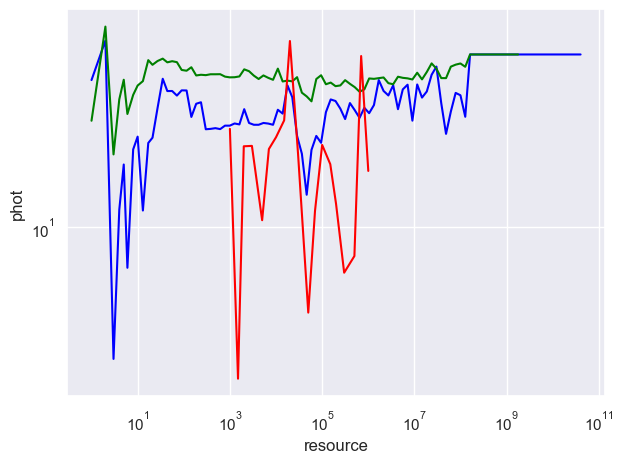

<Figure size 432x288 with 0 Axes>

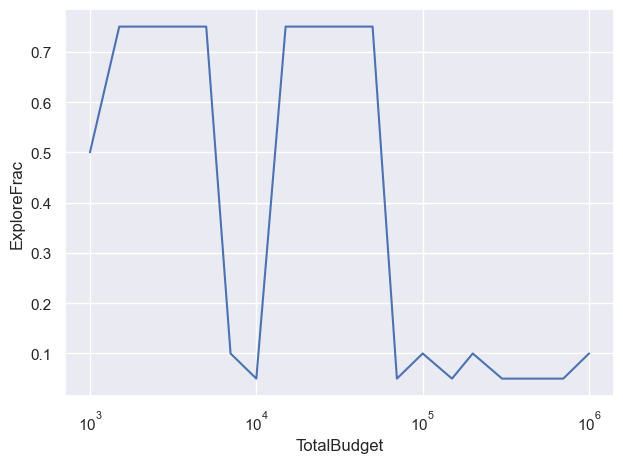

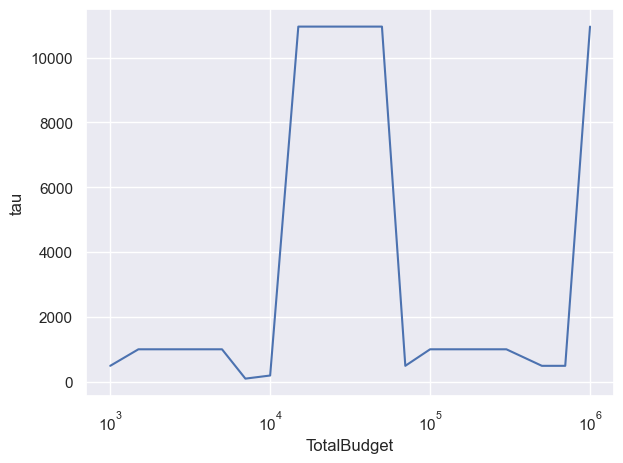

{0: <seaborn._core.plot.Plot at 0x7f2c7bb25cd0>,
 1: <seaborn._core.plot.Plot at 0x7f2c7badfe20>}

In [261]:
# parameter_names = ['swe', 'rep', 'pcold', 'phot']
# here = 'example_data/wishart_N=50_alpha=0.80'

# def resource_fcn(df):
#     return df['swe'] * df['rep'] * df['boots']
# sb = stochastic_benchmark.stochastic_benchmark(parameter_names, here=here,\
#                                                resource_fcn=resource_fcn)
# rsParams = random_exploration.RandomSearchParameters()
# sb.project_recs()
# sb.run_random_exploration(rsParams)

sb = wishart_setup(50, '0.80')
sb.plot_performance('PerfRatio', 'median')
sb.plot_parameters('PerfRatio')
sb.plot_random_metaparams()

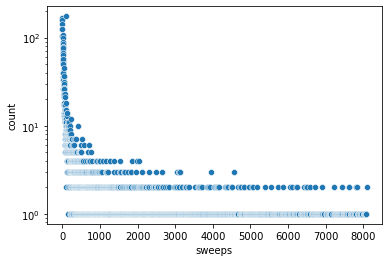

In [42]:
small_results = df[df['boots'] == 1]
count_sweeps = small_results.groupby('sweeps').size()
count_sweeps.name = 'count'
count_sweeps = count_sweeps.to_frame()
sns.scatterplot(x='sweeps', y='count', data = count_sweeps)
ax = plt.gca()
ax.set_yscale('log')

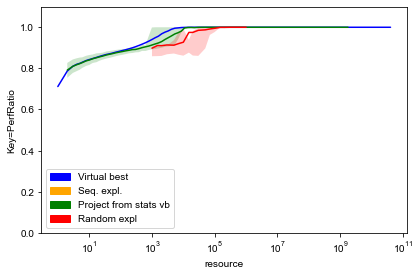

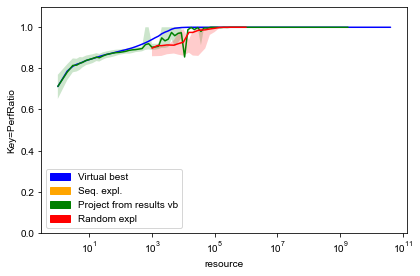

Best recommended parameters generated from stats


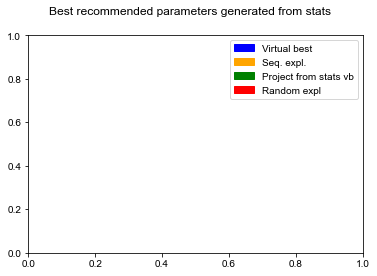

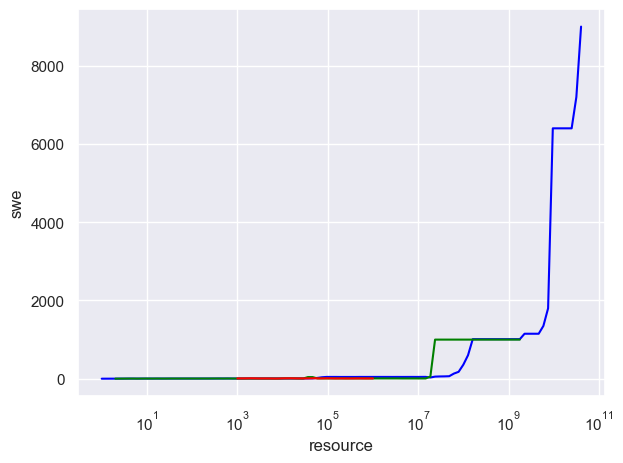

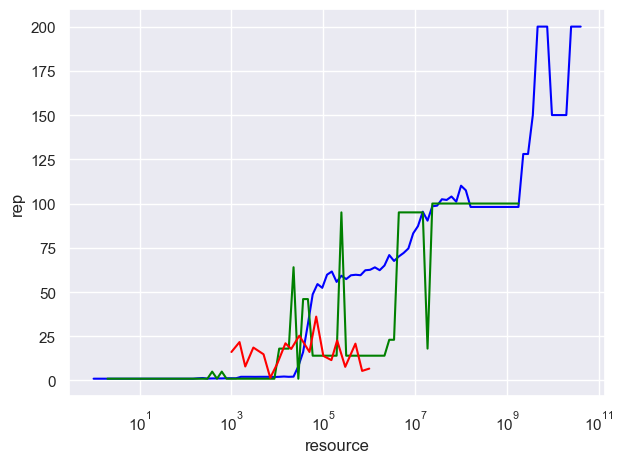

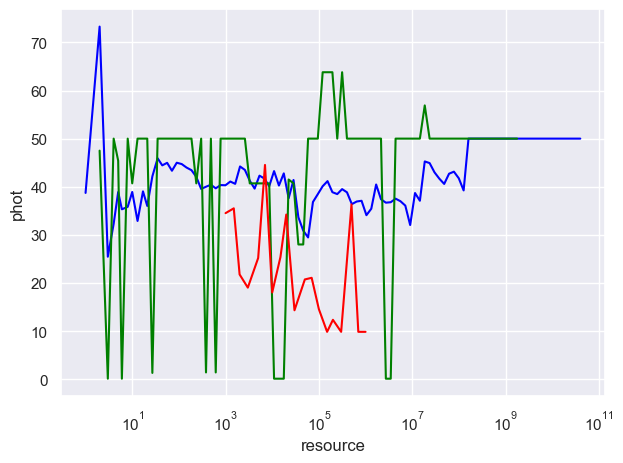

Best recommended parameters generated from results


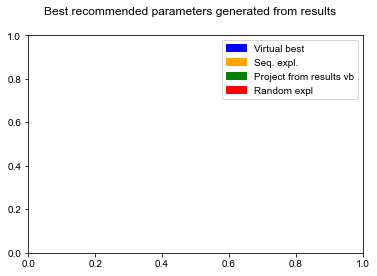

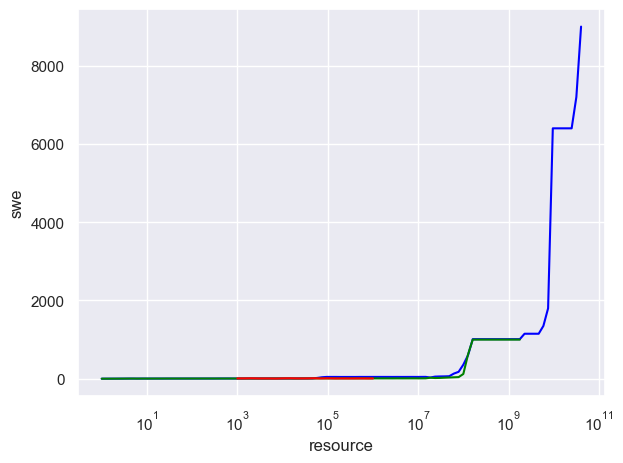

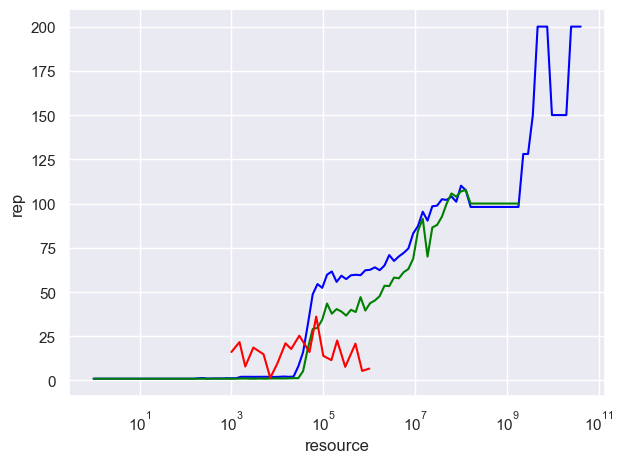

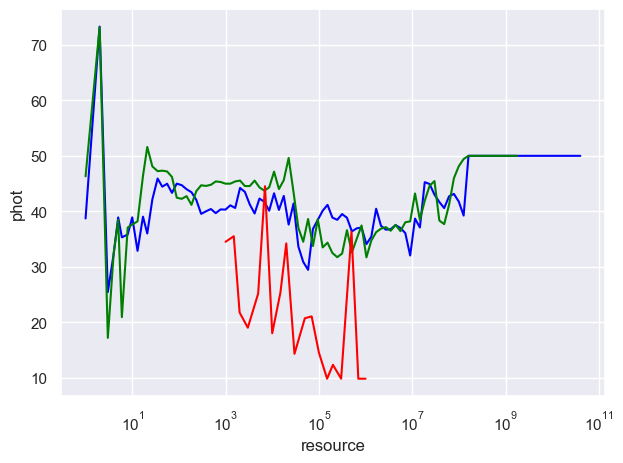

<Figure size 432x288 with 0 Axes>

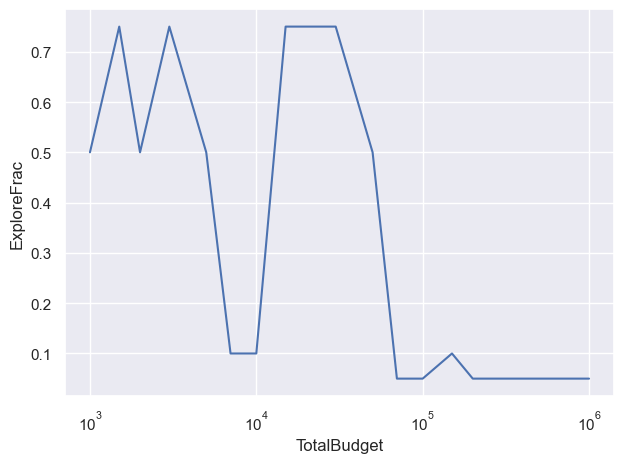

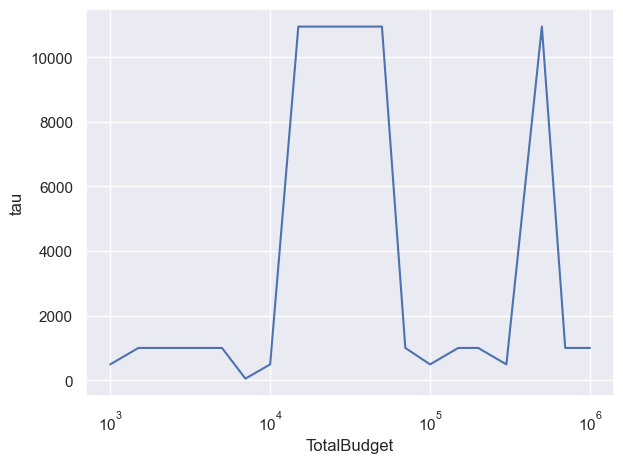

{0: <seaborn._core.plot.Plot at 0x7f2c767ed6d0>,
 1: <seaborn._core.plot.Plot at 0x7f2c767a23a0>}

In [275]:
# parameter_names = ['swe', 'rep', 'phot']
# here = 'example_data/wishart_N=50_alpha=0.80_nopcold'

# def resource_fcn(df):
#     return df['swe'] * df['rep'] * df['boots']
# sb = stochastic_benchmark.stochastic_benchmark(parameter_names, here=here,\
#                                                resource_fcn=resource_fcn)
# sb.project_recs()
# sb.run_random_exploration()
# sb.plot_performance()
# sb.plot_parameters()

sb = wishart_setup(50, '0.80', 'nopcold')
sb.plot_performance('PerfRatio', 'median')
sb.plot_parameters('PerfRatio')
sb.plot_random_metaparams()

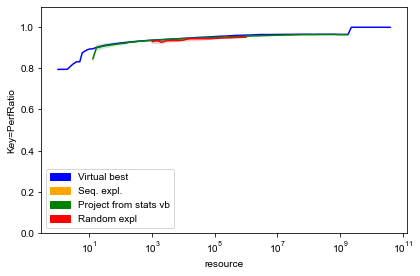

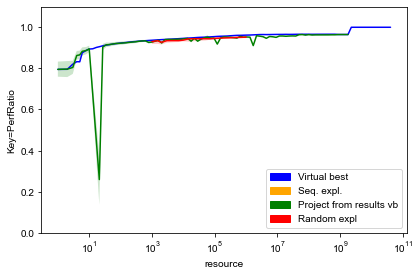

Best recommended parameters generated from stats


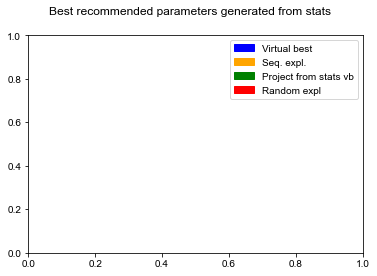

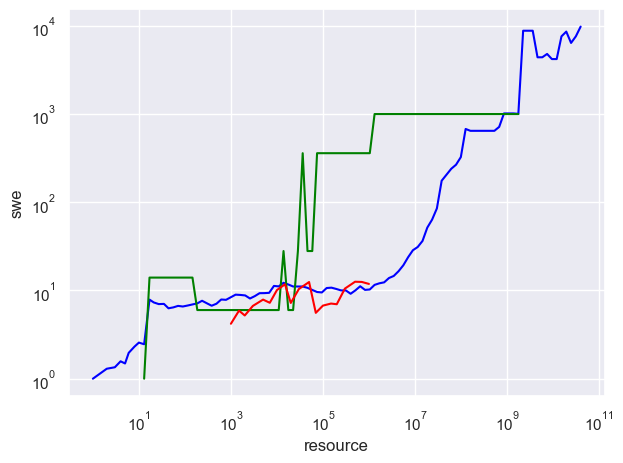

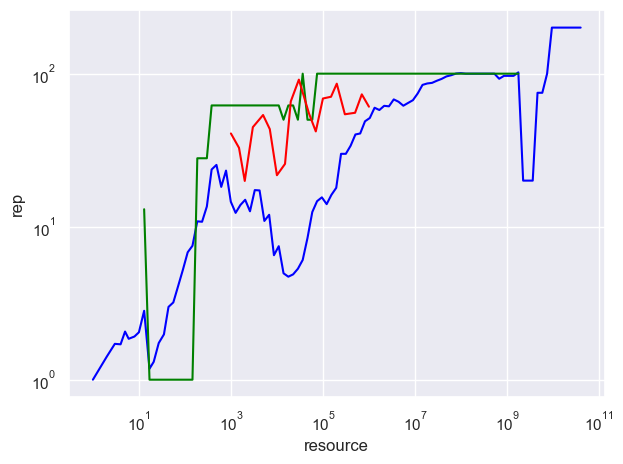

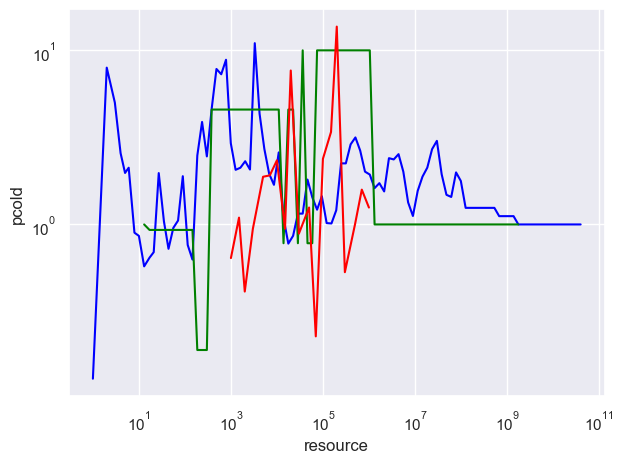

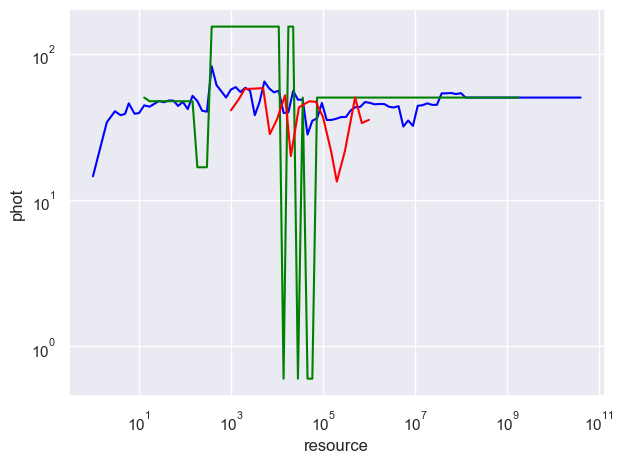

Best recommended parameters generated from results


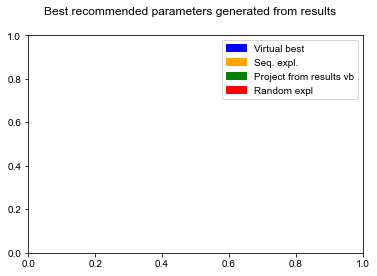

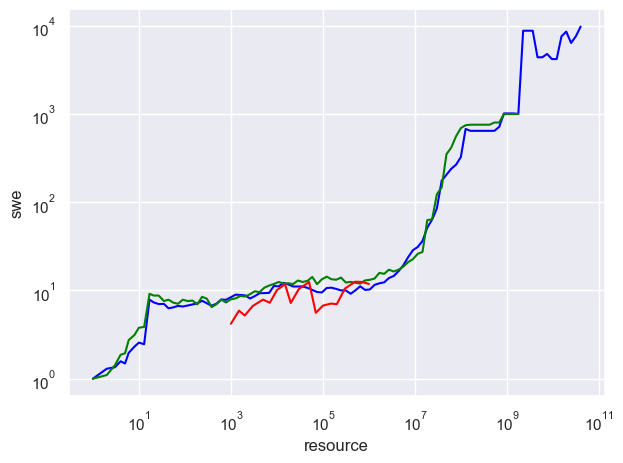

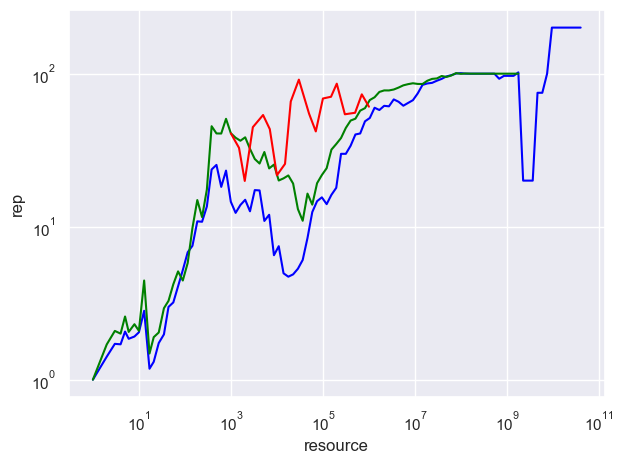

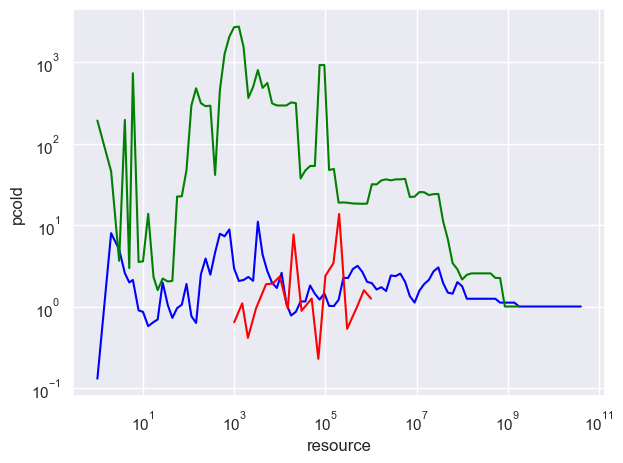

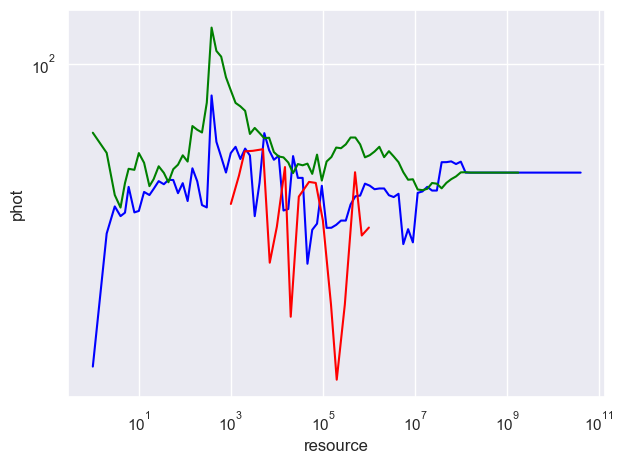

<Figure size 432x288 with 0 Axes>

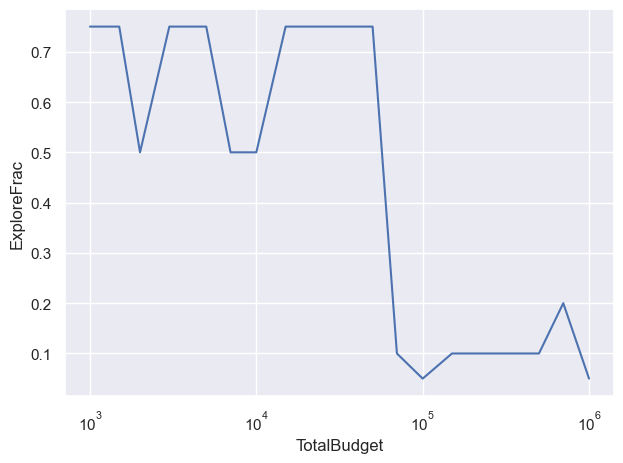

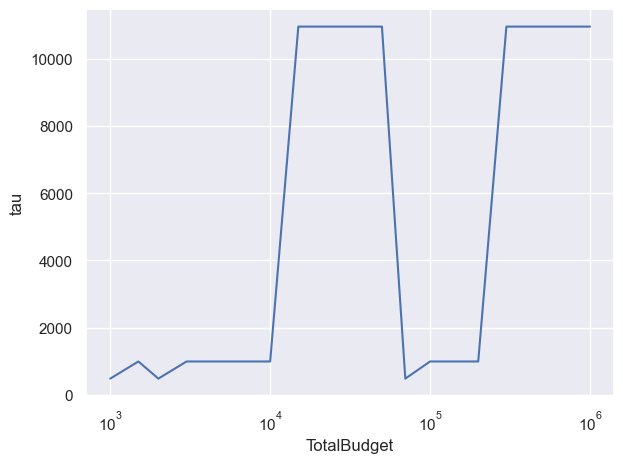

{0: <seaborn._core.plot.Plot at 0x7f2c8225aee0>,
 1: <seaborn._core.plot.Plot at 0x7f2c85466100>}

In [271]:
sb = wishart_setup(100, '0.50')
sb.plot_performance('PerfRatio', 'median')
sb.plot_parameters('PerfRatio')
sb.plot_random_metaparams()

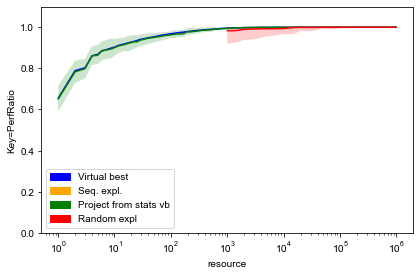

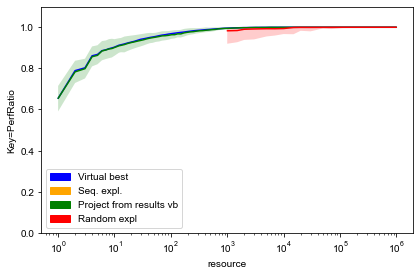

Best recommended parameters generated from stats


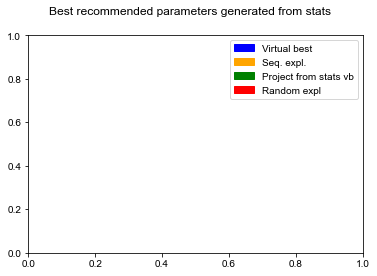

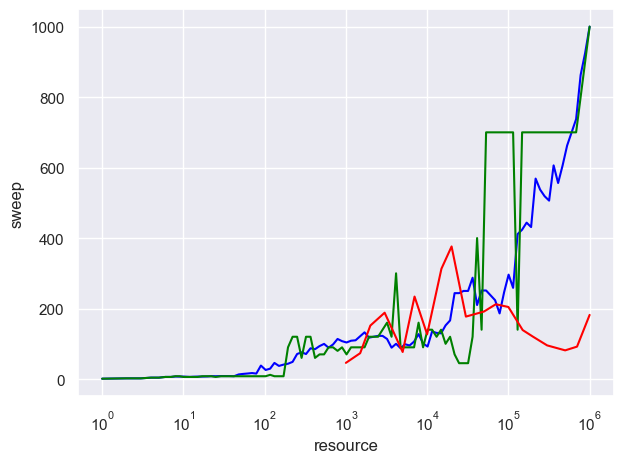

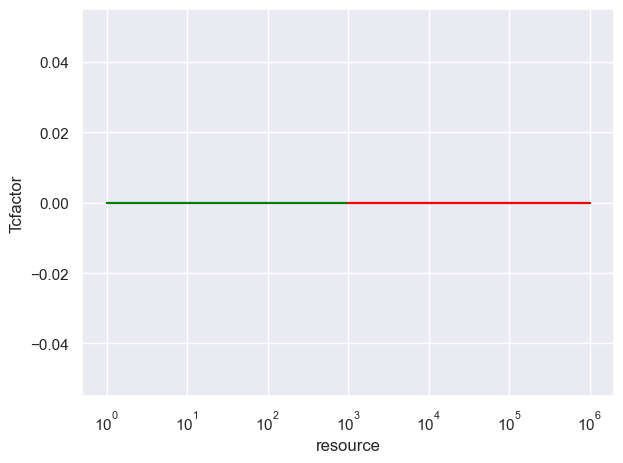

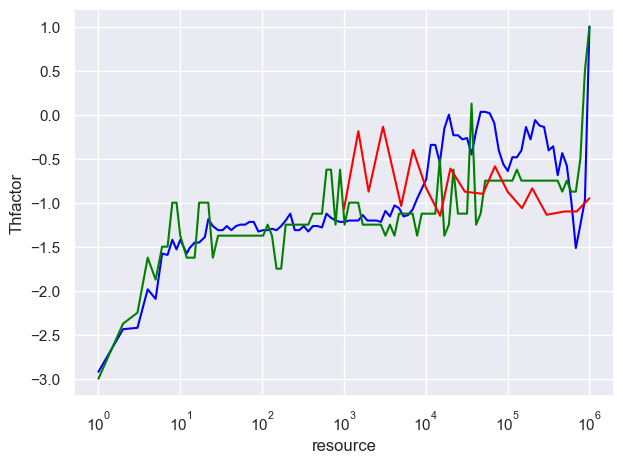

Best recommended parameters generated from results


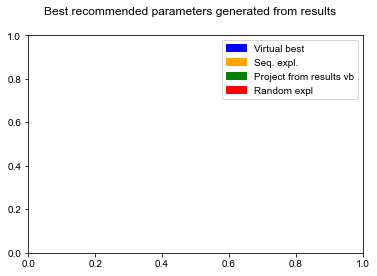

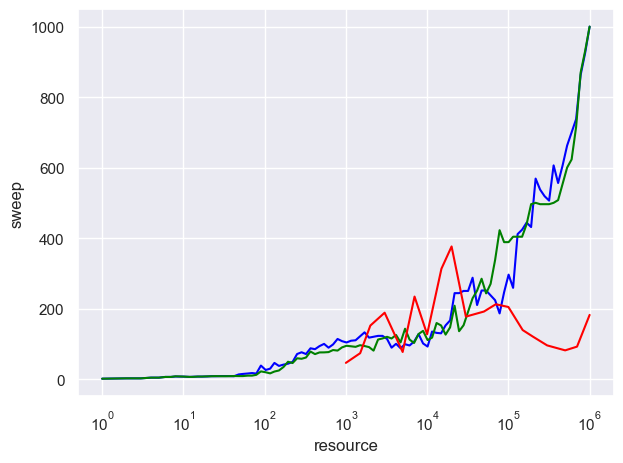

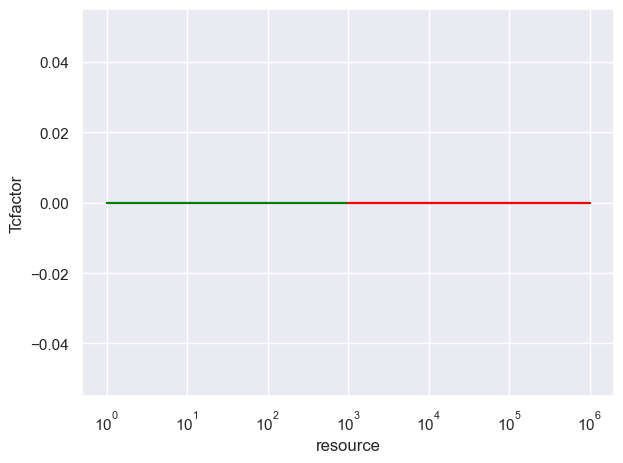

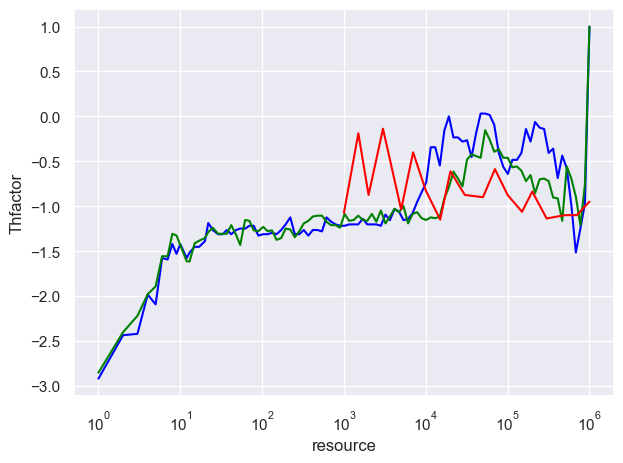

<Figure size 432x288 with 0 Axes>

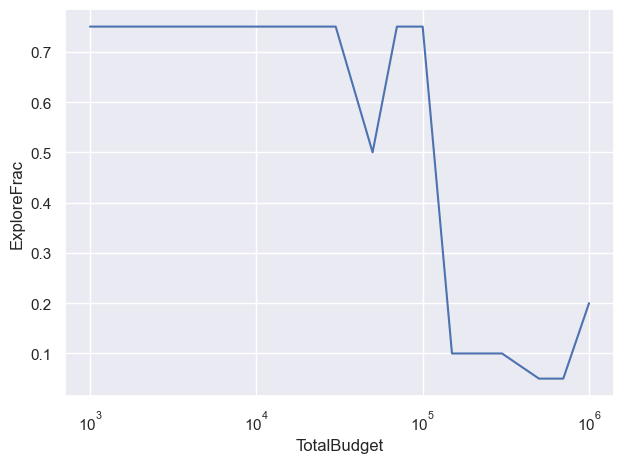

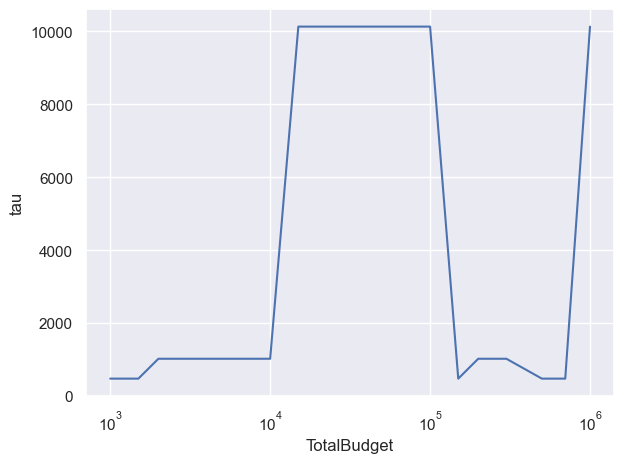

{0: <seaborn._core.plot.Plot at 0x7f2c81da2a90>,
 1: <seaborn._core.plot.Plot at 0x7f2c79db7700>}

In [276]:

# here = 'example_data/sk_pleiades_n=100'
# sb = stochastic_benchmark.stochastic_benchmark(parameter_names, here=here)
# sb.project_recs()
# sb.run_random_exploration()
# sb.plot_performance()
# sb.plot_parameters()

sb = skpleiades_setup(100)
sb.plot_performance('PerfRatio', 'median')
sb.plot_parameters('PerfRatio')
sb.plot_random_metaparams()

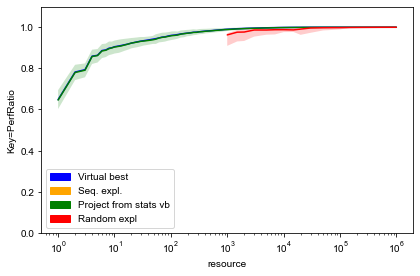

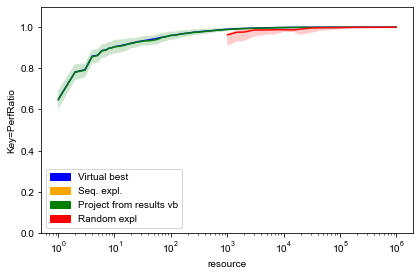

Best recommended parameters generated from stats


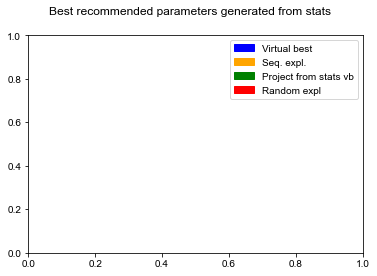

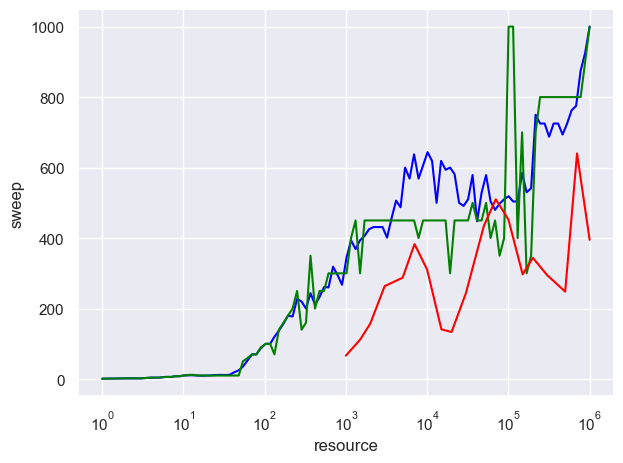

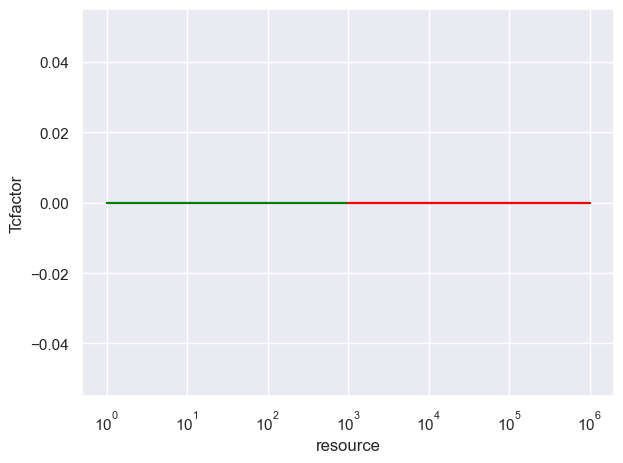

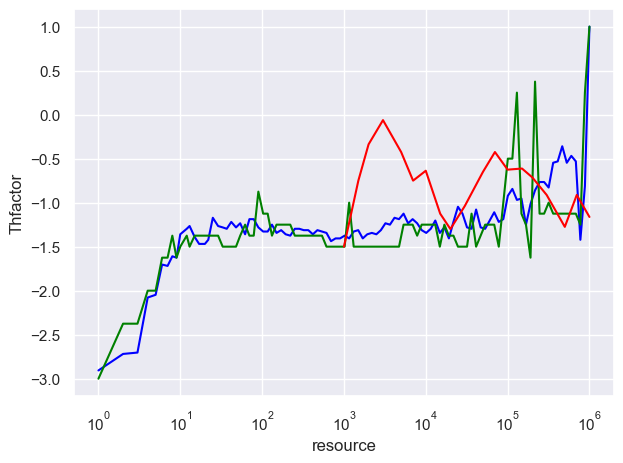

Best recommended parameters generated from results


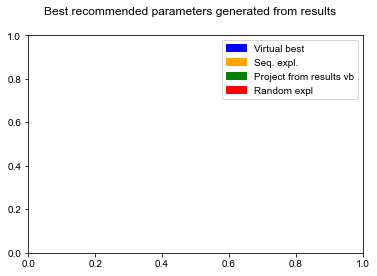

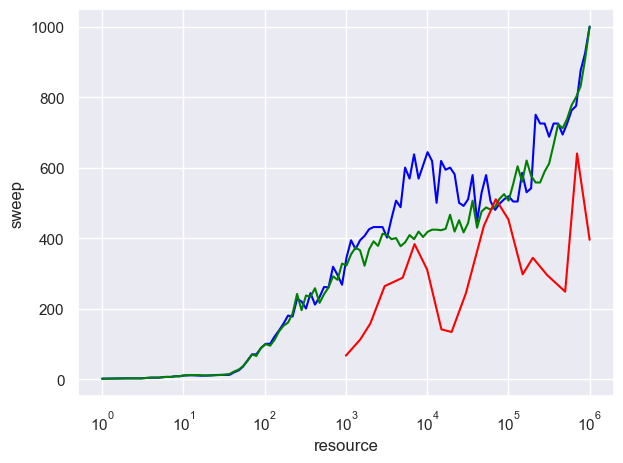

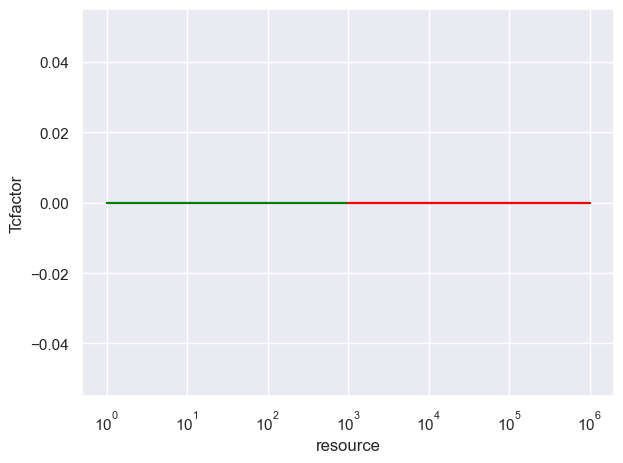

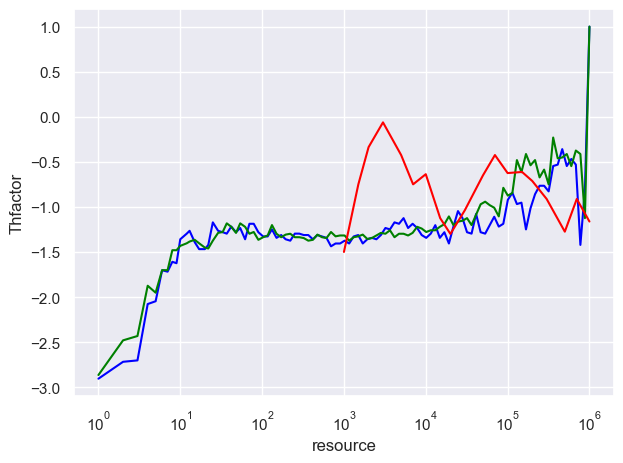

<Figure size 432x288 with 0 Axes>

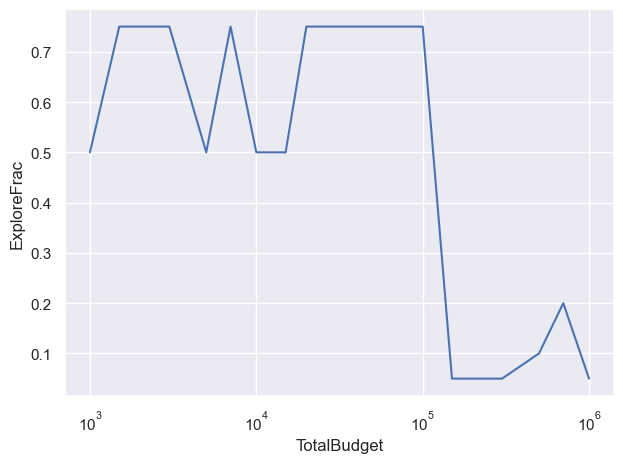

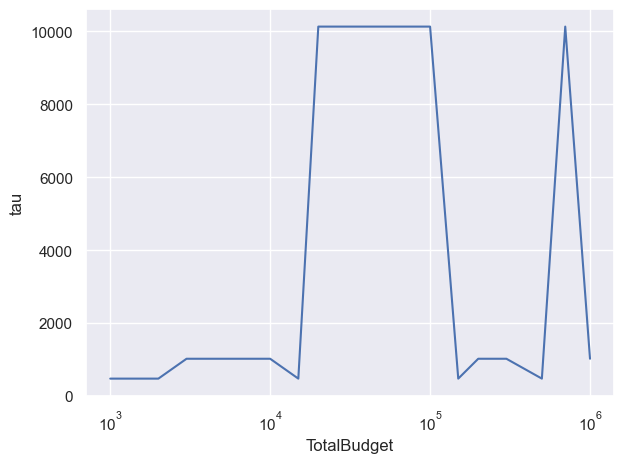

{0: <seaborn._core.plot.Plot at 0x7f2c73b36a30>,
 1: <seaborn._core.plot.Plot at 0x7f2c73ddf340>}

In [277]:
sb = skpleiades_setup(200)
sb.plot_performance('PerfRatio', 'median')
sb.plot_parameters('PerfRatio')
sb.plot_random_metaparams()